<a href="https://colab.research.google.com/github/Talha1818/Randomized_Optimization_RHC_GA_GD_SA/blob/master/Randomized_Optimization_RHC_GA_GD_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlrose

# **Part 1: Neural Network Optimization**

In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# URL of the dataset on UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Define column names for the dataset
column_names = [
    "ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
    "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
    "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity",
    "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
    "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
    "Worst Symmetry", "Worst Fractal Dimension"
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

In [ ]:
df.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,SE Radius,SE Texture,SE Perimeter,SE Area,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dimension,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# remove the ID feature that is irrelevent
df = df.drop('ID', axis = 1)

In [ ]:
df['Diagnosis'].value_counts() # check the class distribution

B    357
M    212
Name: Diagnosis, dtype: int64

In [ ]:
# lets convert the class feature into numeric form
df['Diagnosis'] = df['Diagnosis'].map({'B':0, 'M':1})

In [ ]:
df.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,SE Radius,SE Texture,SE Perimeter,SE Area,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dimension,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def dataset_statistics(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    # print(f"Column names: {column_names}\n")
    print("Any Duplicated Values: {}\n".format(df.duplicated().any())) # check duplicated values
    print("Data types:")
    print(data_types)

In [ ]:
# check the statistics of dataset
dataset_statistics(df)

Total rows: 569

Total columns: 31

Any Duplicated Values: False

Data types:
float64    30
int64       1
dtype: int64


In [ ]:
# check any missing values
df.isnull().sum()

Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import time

In [ ]:
# extract the dependent and indepenedent features
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [ ]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [ ]:
# lets split the dataset 80% for training and 20% for testing
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.2)

Training shape: (455, 30)
Testing shape: (114, 30)


In [ ]:
# lets normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def optimization_algorithms(X_train, X_test, y_train, y_test, algorithm='random_hill_climb',
                            cv=False, iter=100,hidden_nodes=[10,10],restart=10, activation='relu'):
    y_train_accuracy = 0
    y_test_accuracy = 0
    f1_score_train = 0
    f1_score_test = 0
    cv_scores__ = 0

    for i in range(restart):

        # Train Model
        if algorithm == 'gradient_descent':
            nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation,
                                        algorithm = algorithm, max_iters = iter,
                                        bias = True, is_classifier = True, learning_rate = 0.0001,
                                        early_stopping = True, max_attempts = 10)
        if algorithm == 'random_hill_climb':
            nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation,
                                        algorithm = algorithm, max_iters = iter,
                                        bias = True, is_classifier = True,
                                        early_stopping = True, max_attempts = 100)
        if algorithm == 'simulated_annealing':
            schedule = mlrose.GeomDecay(init_temp=100, decay=0.5, min_temp=0.1)
            nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation,
                                        algorithm = algorithm, max_iters = iter,
                                        bias = True, is_classifier = True,
                                        early_stopping = True, max_attempts = 100)
        if algorithm == 'genetic_alg':
            nn_model = mlrose.NeuralNetwork(hidden_nodes = hidden_nodes, activation = activation,
                                        algorithm = algorithm, max_iters = iter,
                                        bias = True, is_classifier = True,
                                        pop_size = 200, mutation_prob = 0.1,
                                        early_stopping = True, max_attempts = 1000)
        nn_model_cv = nn_model

        nn_model.fit(X_train, y_train)

        # Cross Validation
        if cv == True:
            pipeline = Pipeline([('transformer', scaler), ('estimator', nn_model_cv)])
            cv_scores__ = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy').mean()

        # Scores
        y_train_pred = nn_model.predict(X_train)
        y_train_accuracy = max(y_train_accuracy, accuracy_score(y_train, y_train_pred))
        f1_score_train = max(f1_score_train, f1_score(y_train, y_train_pred))


        y_test_pred = nn_model.predict(X_test)
        y_test_accuracy = max(y_test_accuracy, accuracy_score(y_test, y_test_pred))
        f1_score_test = max(f1_score_test, f1_score(y_test, y_test_pred))


    if cv == True:
        return y_train_accuracy, y_test_accuracy,f1_score_train,f1_score_test, cv_scores__

    return y_train_accuracy, y_test_accuracy,f1_score_train,f1_score_test, f1_score_test


In [ ]:
# Define the parameters
HIDDEN_NODES = [10,10]
ACTIVATION = 'relu'
CROSS_VALIDATION = True
RESTART = 10
ITERATIONS = [50, 100, 150, 200, 500]
ALGORITHMS = ['gradient_descent', 'random_hill_climb', 'simulated_annealing', 'genetic_alg'] # Choose which algorithms to run

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Algorithm", "Iteration", "Train Score", "Test Score", "F1 Score Train", "F1 Score Test", "CV5 Score", "Time"])

# Iterate over algorithms and iterations
for algorithm in ALGORITHMS:
    for iter in tqdm(ITERATIONS, desc=f"Algorithm: {algorithm}"):

        # calculate the start time
        start_time = time.time()

        # call the function optimization_algorithms to get the results from it
        score_train, score_test, score_f1_train, score_f1_test, score_cv5 = optimization_algorithms(X_train, X_test, y_train, y_test, algorithm,
                        CROSS_VALIDATION, iter, HIDDEN_NODES, RESTART, ACTIVATION)

        # calculate the total time taken the algo.
        end = (time.time() - start_time) / RESTART

        # Append the results to the DataFrame
        results_df = results_df.append({
            "Algorithm": algorithm,
            "Iteration": iter,
            "Train Score": score_train,
            "Test Score": score_test,
            "F1 Score Train": score_f1_train,
            "F1 Score Test": score_f1_test,
            "CV5 Score": score_cv5,
            "Time": end
        }, ignore_index=True)

Algorithm: gradient_descent:   0%|          | 0/5 [00:00<?, ?it/s]

Algorithm: random_hill_climb:   0%|          | 0/5 [00:00<?, ?it/s]

Algorithm: simulated_annealing:   0%|          | 0/5 [00:00<?, ?it/s]

Algorithm: genetic_alg:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
def plot(results_df, algo):
    # Filter the results DataFrame by algorithm
    algorithm_results = results_df[results_df["Algorithm"] == algo]

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Subplot 1: Training and Test Accuracy
    sns.lineplot(data=algorithm_results, x="Iteration", y="Train Score", ax=axes[0], label="Training Accuracy", marker='o')
    sns.lineplot(data=algorithm_results, x="Iteration", y="Test Score", ax=axes[0], label="Test Accuracy", marker='o')
    axes[0].set_title(f"Training and Test Accuracy ({algo})")
    axes[0].set_xlabel("Iterations")
    axes[0].set_ylabel("Accuracy")

    # Subplot 2: F1 Score for Training and Test
    sns.lineplot(data=algorithm_results, x="Iteration", y="F1 Score Train", ax=axes[1], label="F1 Score Train", marker='o')
    sns.lineplot(data=algorithm_results, x="Iteration", y="F1 Score Test", ax=axes[1], label="F1 Score Test", marker='o')
    axes[1].set_title(f"F1 Score for Training and Test ({algo})")
    axes[1].set_xlabel("Iterations")
    axes[1].set_ylabel("F1 Score")

    # Subplot 3: Time Taken
    sns.lineplot(data=algorithm_results, x="Iteration", y="Time", ax=axes[2], label="Time", marker='o')
    axes[2].set_title(f"Time Taken ({algo})")
    axes[2].set_xlabel("Iterations")
    axes[2].set_ylabel("Time (seconds)")

    for ax in axes:
        ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def plot_bar_plot(results_df, y='Test Score'):
  # Create a bar plot
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(data=results_df, x='Iteration', y=y, palette='viridis', hue='Algorithm')
  plt.title(f'{y} by Each Algorithm')
  plt.xlabel('# of Iteration')
  if y == 'Time':
    plt.ylabel(f'Time (seconds)')
  else:
    plt.ylabel(f'{y}')

  plt.xticks(rotation=45)
  plt.tight_layout()

  for p in ax.patches:
      ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
  plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

### **Results of Gradient Descent**

In [ ]:
results_df[results_df["Algorithm"] == "gradient_descent"]

,Algorithm,Iteration,Train Score,Test Score,F1 Score Train,F1 Score Test,CV5 Score,Time
0,gradient_descent,50,0.947253,0.956140,0.927273,0.943820,0.386384,0.807906
1,gradient_descent,100,0.960440,0.956140,0.944785,0.945055,0.541655,1.521767
2,gradient_descent,150,0.967033,0.973684,0.954407,0.967033,0.483201,2.194225
3,gradient_descent,200,0.982418,0.973684,0.975610,0.968421,0.465549,2.950165
4,gradient_descent,500,0.986813,0.973684,0.981481,0.967742,0.360767,6.937154


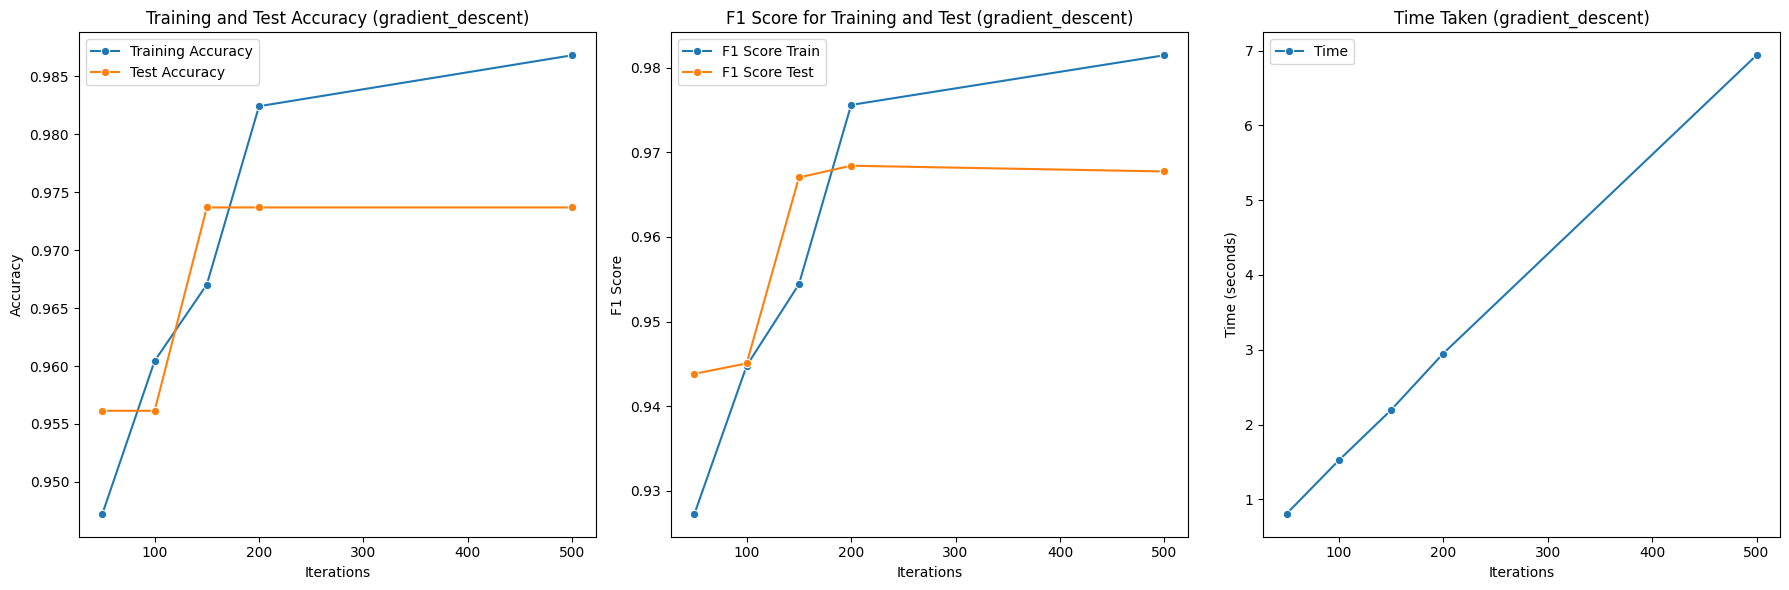

In [ ]:
plot(results_df, "gradient_descent")

### **Results of Randomised Hill Climbing**

In [ ]:
results_df[results_df["Algorithm"] == "random_hill_climb"]

,Algorithm,Iteration,Train Score,Test Score,F1 Score Train,F1 Score Test,CV5 Score,Time
5,random_hill_climb,50,0.716484,0.763158,0.659631,0.742857,0.569694,0.749444
6,random_hill_climb,100,0.819780,0.815789,0.735484,0.769231,0.570843,1.448198
7,random_hill_climb,150,0.698901,0.736842,0.637965,0.722222,0.541158,2.100147
8,random_hill_climb,200,0.782418,0.789474,0.728767,0.755102,0.687021,2.822730
9,random_hill_climb,500,0.960440,0.947368,0.944099,0.933333,0.741453,6.065965


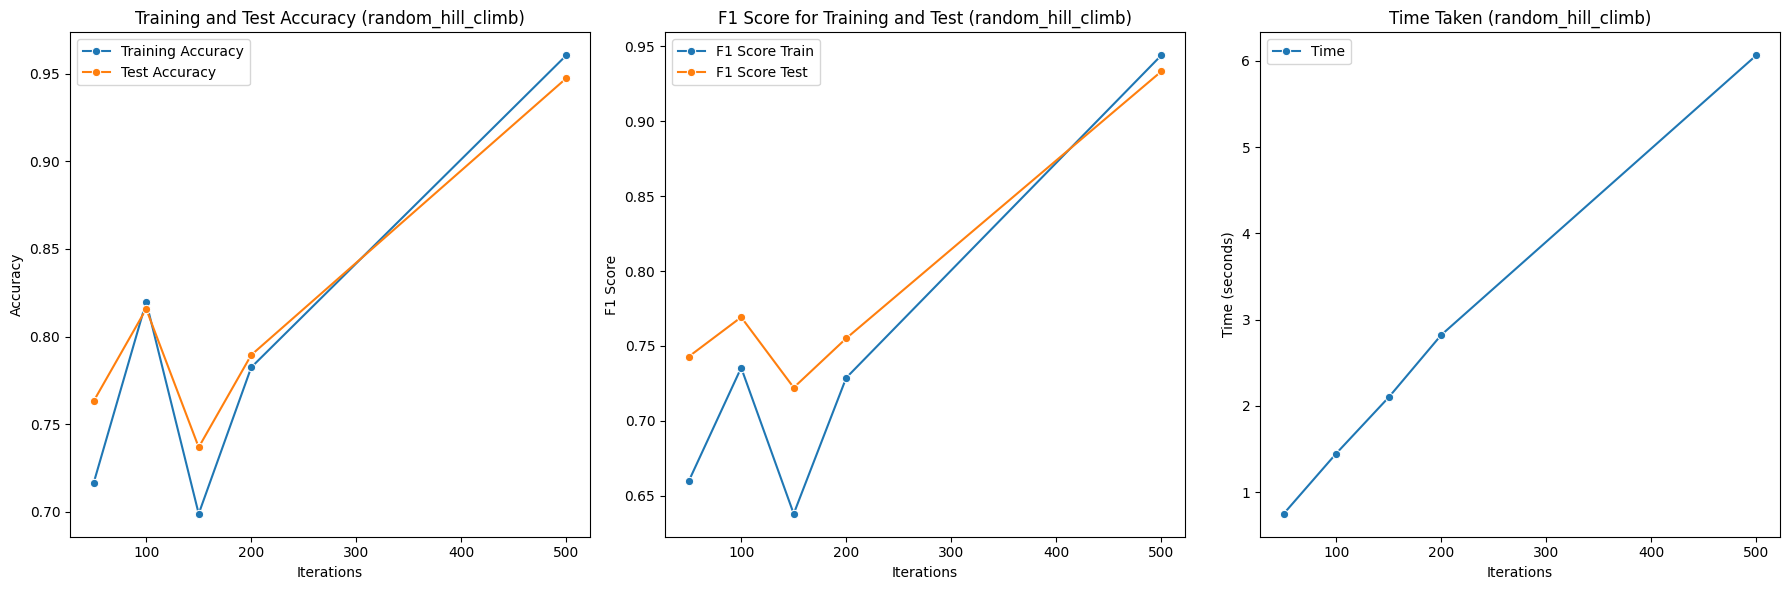

In [ ]:
plot(results_df, "random_hill_climb")

### **Results of Simulated Annealing**

In [ ]:
results_df[results_df["Algorithm"] == "simulated_annealing"]

,Algorithm,Iteration,Train Score,Test Score,F1 Score Train,F1 Score Test,CV5 Score,Time
10,simulated_annealing,50,0.782418,0.728070,0.585774,0.652482,0.572970,0.787717
11,simulated_annealing,100,0.694505,0.684211,0.630841,0.666667,0.639761,1.503349
12,simulated_annealing,150,0.789011,0.728070,0.641791,0.635294,0.646701,2.230083
13,simulated_annealing,200,0.775824,0.763158,0.661836,0.647619,0.500621,2.927491
14,simulated_annealing,500,0.729670,0.666667,0.696296,0.641509,0.803307,6.899224


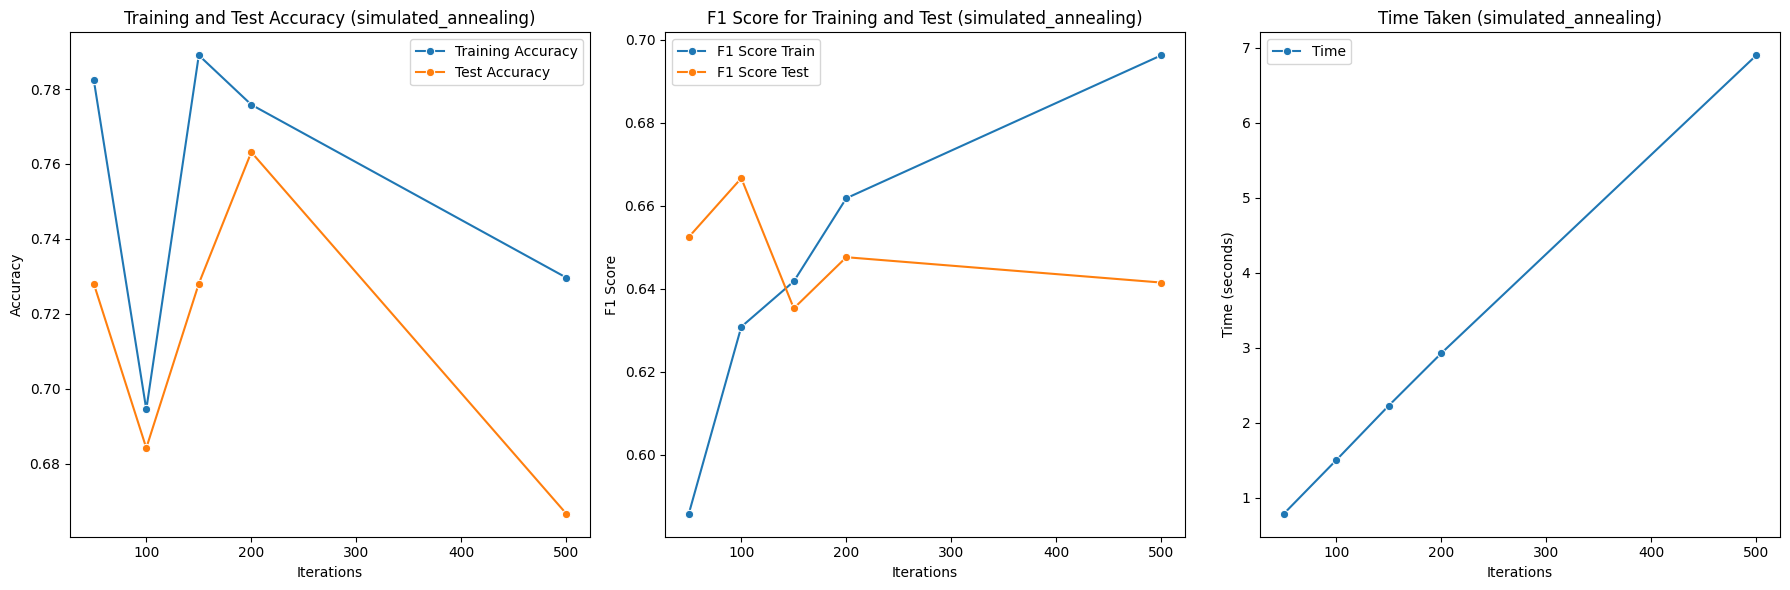

In [ ]:
plot(results_df, "simulated_annealing")

### **Results of Genetic Algorithm**

In [ ]:
results_df[results_df["Algorithm"] == "genetic_alg"]

,Algorithm,Iteration,Train Score,Test Score,F1 Score Train,F1 Score Test,CV5 Score,Time
15,genetic_alg,50,0.947253,0.921053,0.928571,0.907216,0.419981,18.841859
16,genetic_alg,100,0.938462,0.938596,0.913580,0.927835,0.526813,37.358116
17,genetic_alg,150,0.953846,0.973684,0.934169,0.969072,0.692268,55.635667
18,genetic_alg,200,0.949451,0.964912,0.928349,0.955556,0.544869,73.626486
19,genetic_alg,500,0.953846,0.973684,0.936556,0.968421,0.834793,183.302163


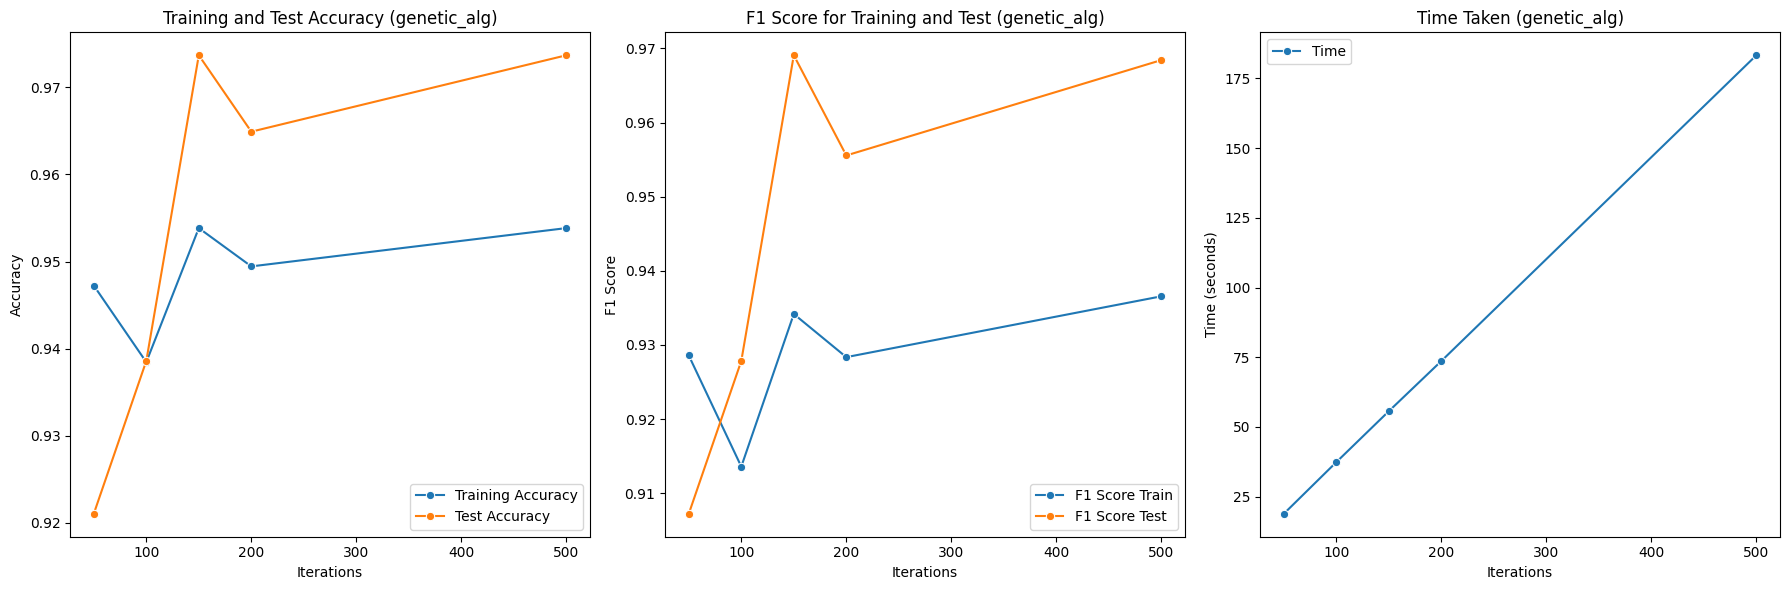

In [ ]:
plot(results_df, "genetic_alg")

In [ ]:
def plot_combined(results_df, algos):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Subplot 1: Training and Test Accuracy
    for algo in algos:
        algorithm_results = results_df[results_df["Algorithm"] == algo]
        # sns.lineplot(data=algorithm_results, x="Iteration", y="Train Score", ax=axes[0, 0], label=f"{algo} Train", marker='o')
        sns.lineplot(data=algorithm_results, x="Iteration", y="Test Score", ax=axes[0, 0], label=f"{algo} Test", marker='o')
    axes[0, 0].set_title("Test Accuracy (All Algorithms)")
    axes[0, 0].set_xlabel("Iterations")
    axes[0, 0].set_ylabel("Accuracy")

    # Subplot 2: F1 Score for Training and Test
    for algo in algos:
        algorithm_results = results_df[results_df["Algorithm"] == algo]
        # sns.lineplot(data=algorithm_results, x="Iteration", y="F1 Score Train", ax=axes[0, 1], label=f"{algo} Train", marker='o')
        sns.lineplot(data=algorithm_results, x="Iteration", y="F1 Score Test", ax=axes[0, 1], label=f"{algo} Test", marker='o')
    axes[0, 1].set_title("F1 Score for Test (All Algorithms)")
    axes[0, 1].set_xlabel("Iterations")
    axes[0, 1].set_ylabel("F1 Score")

    # Subplot 3: Time Taken
    for algo in algos:
        algorithm_results = results_df[results_df["Algorithm"] == algo]
        sns.lineplot(data=algorithm_results, x="Iteration", y="Time", ax=axes[1, 0], label=f"{algo}", marker='o')
    axes[1, 0].set_title("Time Taken (All Algorithms)")
    axes[1, 0].set_xlabel("Iterations")
    axes[1, 0].set_ylabel("Time (seconds)")

    # Remove the empty subplot if it exists
    fig.delaxes(axes[1, 1])

    axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

### **Combine the Results**

In [ ]:
results_df

,Algorithm,Iteration,Train Score,Test Score,F1 Score Train,F1 Score Test,CV5 Score,Time
0,gradient_descent,50,0.947253,0.956140,0.927273,0.943820,0.386384,0.807906
1,gradient_descent,100,0.960440,0.956140,0.944785,0.945055,0.541655,1.521767
2,gradient_descent,150,0.967033,0.973684,0.954407,0.967033,0.483201,2.194225
3,gradient_descent,200,0.982418,0.973684,0.975610,0.968421,0.465549,2.950165
4,gradient_descent,500,0.986813,0.973684,0.981481,0.967742,0.360767,6.937154
5,random_hill_climb,50,0.716484,0.763158,0.659631,0.742857,0.569694,0.749444
6,random_hill_climb,100,0.819780,0.815789,0.735484,0.769231,0.570843,1.448198
7,random_hill_climb,150,0.698901,0.736842,0.637965,0.722222,0.541158,2.100147
8,random_hill_climb,200,0.782418,0.789474,0.728767,0.755102,0.687021,2.822730
9,random_hill_climb,500,0.960440,0.947368,0.944099,0.933333,0.741453,6.065965


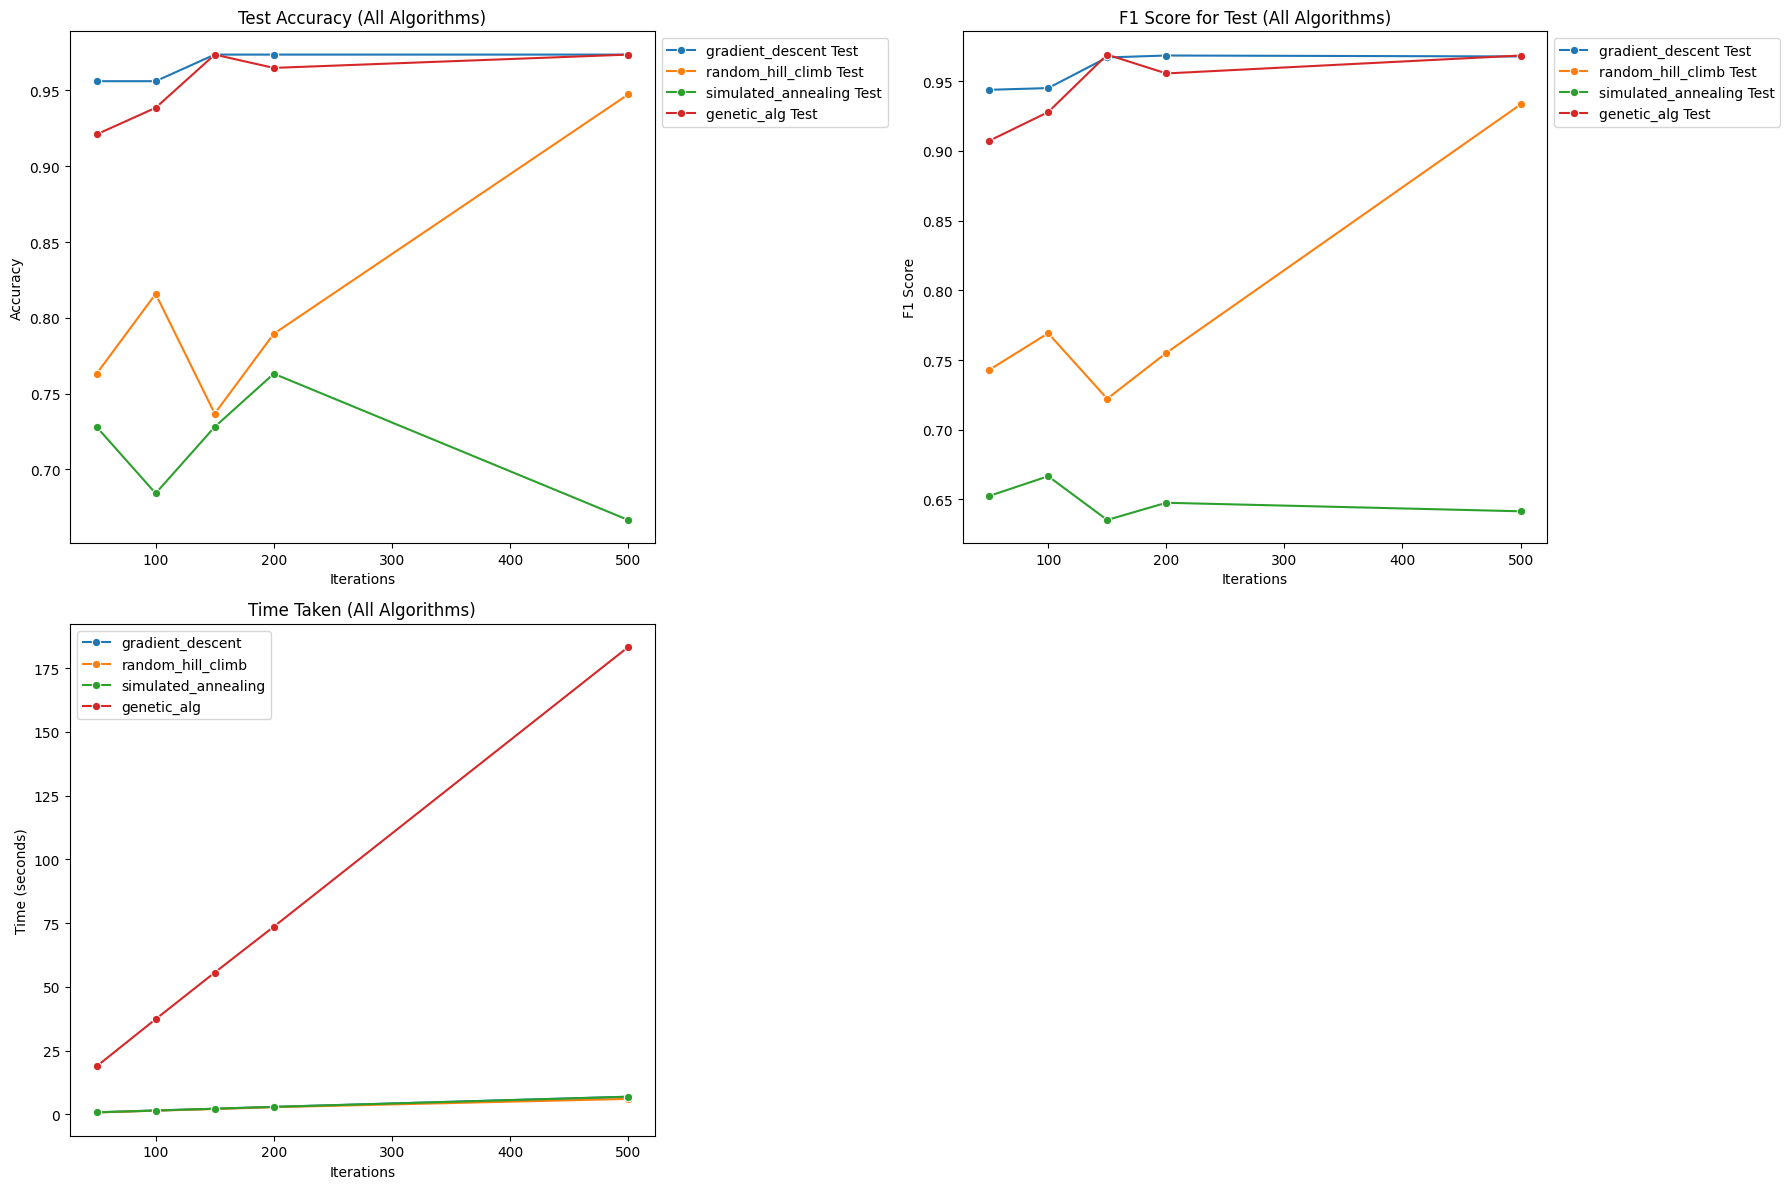

In [ ]:
algos_to_combine = ["gradient_descent", "random_hill_climb", "simulated_annealing", "genetic_alg"]
plot_combined(results_df, algos_to_combine)

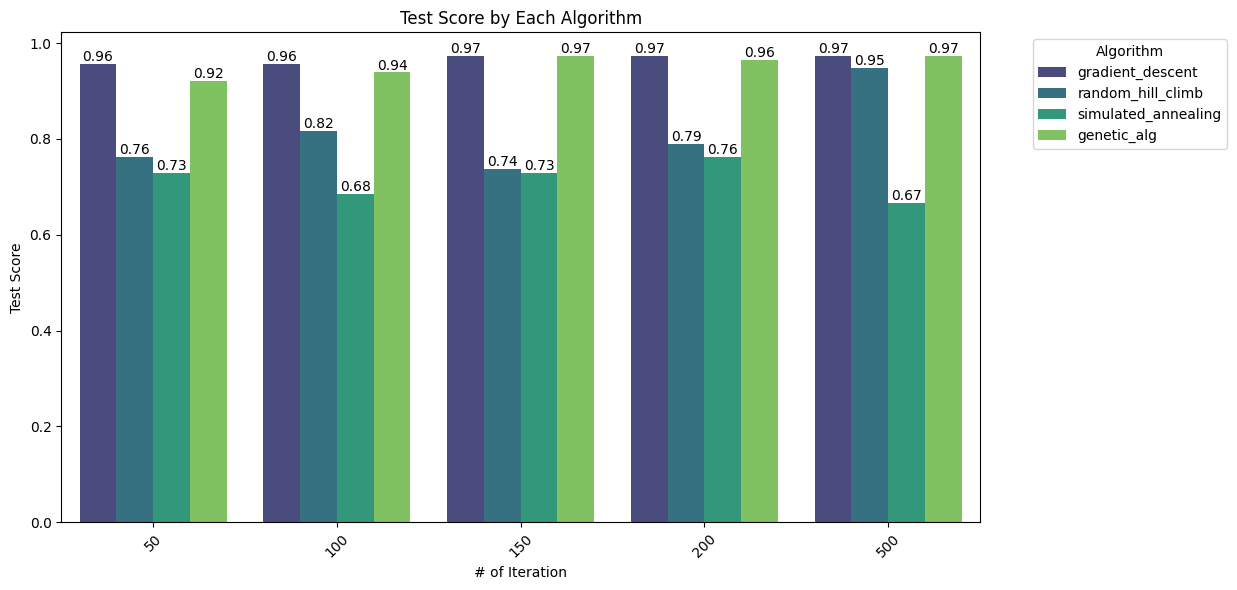

In [ ]:
plot_bar_plot(results_df, y='Test Score')

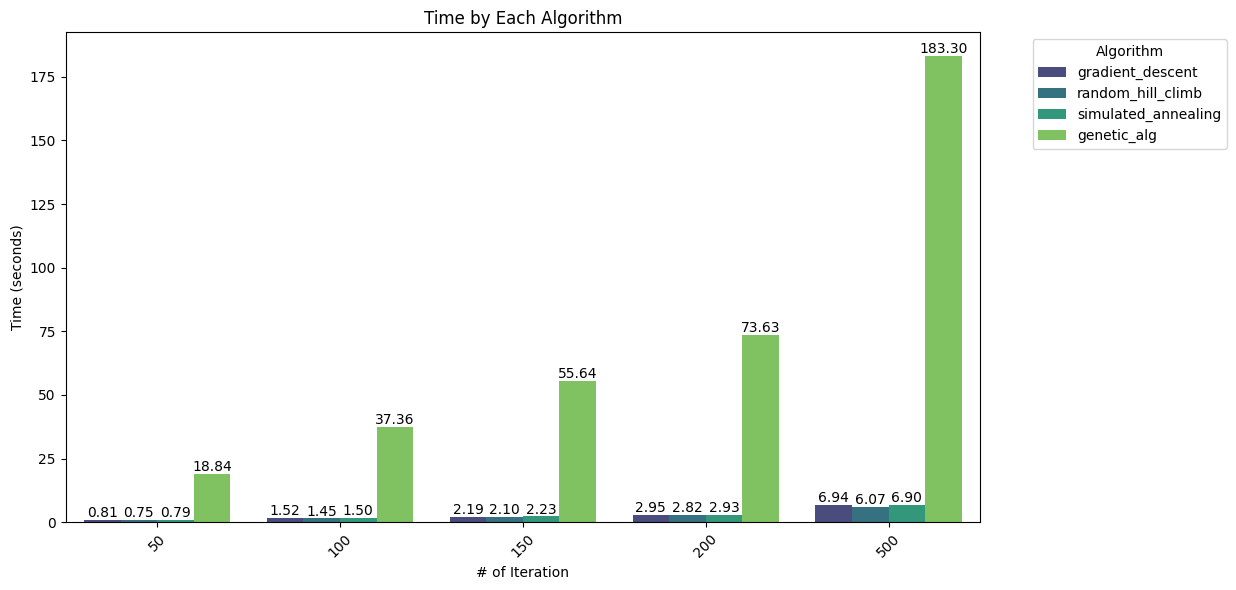

In [ ]:
plot_bar_plot(results_df, y='Time')

**Gradient Descent:**

* The algorithm exhibits steady improvement in the testing score as the number of iterations increases.
* At 50 iterations, the testing score is 0.956140, and it takes 0.807906 seconds.
* The highest testing score achieved by this algorithm is 0.973684 at 200 iterations.
* It takes 2.950165 seconds to complete with 200 iterations.
The algorithm is computationally efficient and achieves a high testing score.

**Random Hill Climb:**
* The testing score improves with more iterations.
At 50 iterations, the testing score is 0.763158, and it takes 0.749444 seconds.
* The highest testing score for this algorithm is 0.947368 at 500 iterations.
* It takes 6.065965 seconds with 500 iterations, which is relatively slow.
* The algorithm is effective in improving accuracy but slower compared to Gradient Descent.

**Simulated Annealing:**
* The testing score fluctuates with the number of iterations.
* At 50 iterations, the testing score is 0.728070, and it takes 0.787717 seconds.
* The highest testing score for this algorithm is 0.728070 at 500 iterations.
* It takes 6.899224 seconds with 500 iterations.
* The algorithm's performance is less consistent compared to others.

**Genetic Algorithm:**

* The algorithm starts with a high testing score of 0.921053 at 50 iterations.
* The testing score remains consistently high as the number of iterations increases.
* The highest testing score for this algorithm is 0.973684 at 150 iterations.
* It takes 55.635667 seconds with 150 iterations, making it slower.
The algorithm performs well in terms of accuracy but is the slowest among the tested algorithms.

**Conclusion:**
* In terms of accuracy, "Genetic Algorithm" with 150 iterations and "Gradient Descent" with 200 iterations perform the best, both achieving a testing score of 0.973684.
However, considering the trade-off between accuracy and time, "Gradient Descent" with 200 iterations is a better choice as it achieves the same high accuracy as the Genetic Algorithm but takes significantly less time (2.950165 seconds vs. 55.635667 seconds).
* "Random Hill Climb" and "Simulated Annealing" also show improvements in accuracy but are slower compared to Gradient Descent.
"Genetic Algorithm" excels in accuracy but is the slowest algorithm, particularly with a higher number of iterations (150 and 500).

# **Part 2: Optimization Problem Domains**

In [ ]:
def calculate_algo_time(algo):
    start = time.time()
    state, top_score = algo()
    end = time.time()
    ft = end - start
    return state, top_score, ft

## **Continuous Peaks Probelm**

In [ ]:
def get_fitness_score_time_against_each_algo(results_df__, feature='Fitness'):
  if feature == 'Time':
    FF = pd.DataFrame({
      'Problem Size':results_df__['Problem Size'].unique(),
      f'Random Hill Climb ({feature})':results_df__[results_df__['Algorithm']=='Random Hill Climb'][feature].values.tolist(),
      f'Simulated Annealing ({feature})':results_df__[results_df__['Algorithm']=='Simulated Annealing'][feature].values.tolist(),
      f'Genetic Algorithm ({feature})':results_df__[results_df__['Algorithm']=='Genetic Algorithm'][feature].values.tolist(),
      f'MIMIC ({feature})':results_df__[results_df__['Algorithm']=='MIMIC'][feature].values.tolist(),
  })
  else:
      FF = pd.DataFrame({
      'Problem Size':results_df__['Problem Size'].unique(),
      f'Random Hill Climb ({feature})':results_df__[results_df__['Algorithm']=='Random Hill Climb'][feature].values.astype(int),
      f'Simulated Annealing ({feature})':results_df__[results_df__['Algorithm']=='Simulated Annealing'][feature].values.astype(int),
      f'Genetic Algorithm ({feature})':results_df__[results_df__['Algorithm']=='Genetic Algorithm'][feature].values.astype(int),
      f'MIMIC ({feature})':results_df__[results_df__['Algorithm']=='MIMIC'][feature].values.astype(int),
  })
  return FF

In [ ]:
# Create empty DataFrames for each algorithm
columns = ['Problem', 'Algorithm', 'Problem Size', 'Time', 'Fitness']
results_df_ = pd.DataFrame(columns=columns)

def run_continuous_peaks(num_points):
    continuous_peaks = mlrose.DiscreteOpt(length=num_points, fitness_fn=mlrose.ContinuousPeaks(t_pct=0.15))
    # print("Continuous Peaks Problem with", num_points, "points")

    # Define algorithms and their names
    algorithms = [
        (lambda: mlrose.random_hill_climb(problem=continuous_peaks, max_attempts=6), 'Random Hill Climb'),
        (lambda: mlrose.simulated_annealing(problem=continuous_peaks, max_attempts=6), 'Simulated Annealing'),
        (lambda: mlrose.genetic_alg(pop_size=30, problem=continuous_peaks, max_attempts=6), 'Genetic Algorithm'),
        (lambda: mlrose.mimic(pop_size=30, problem=continuous_peaks, max_attempts=6), 'MIMIC')
    ]

    for algo_func, algo_name in algorithms:
        state, top_score, time_diff = calculate_algo_time(algo_func)
        results_df_.loc[len(results_df_)] = ['Continuous Peaks', algo_name, num_points, time_diff, top_score]

point_range = range(10, 100, 10)
for p in tqdm(point_range):
    run_continuous_peaks(p)

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
get_fitness_score_time_against_each_algo(results_df_, 'Fitness')

,Problem Size,Random Hill Climb (Fitness),Simulated Annealing (Fitness),Genetic Algorithm (Fitness),MIMIC (Fitness)
0,10,7,16,17,16
1,20,5,36,31,29
2,30,39,46,45,42
3,40,5,58,59,51
4,50,10,70,62,12
5,60,6,26,20,14
6,70,8,39,11,14
7,80,5,38,15,16
8,90,8,31,18,18


In [ ]:
get_fitness_score_time_against_each_algo(results_df_, 'Time')

,Problem Size,Random Hill Climb (Time),Simulated Annealing (Time),Genetic Algorithm (Time),MIMIC (Time)
0,10,0.000502,0.001409,0.039656,0.490847
1,20,0.000318,0.003247,0.051234,1.844384
2,30,0.000924,0.004490,0.070105,5.033071
3,40,0.000583,0.010523,0.083650,9.812590
4,50,0.000474,0.012864,0.037927,11.141343
5,60,0.000396,0.028551,0.041203,21.011483
6,70,0.000641,0.025713,0.031584,27.113074
7,80,0.000434,0.046390,0.072878,44.210102
8,90,0.000689,0.041412,0.070361,51.414001


In [ ]:
def plot_problem_graphs(results_df):
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))

  # Plot for Fitness vs. Problem Size
  sns.lineplot(data=results_df, x='Problem Size', y='Fitness', hue='Algorithm', marker='o', markersize=8, ax=axes[0])
  p = results_df['Problem'].unique()[0]
  axes[0].set_title(f'Fitness vs. Problem Size for Different Algorithms ({p})')
  axes[0].set_xlabel('Problem Size')
  axes[0].set_ylabel('Fitness Score')
  axes[0].legend(loc='best')
  axes[0].grid(True)

  # Plot for Time vs. Problem Size
  sns.lineplot(data=results_df, x='Problem Size', y='Time', hue='Algorithm', marker='o', markersize=8, ax=axes[1])
  axes[1].set_title(f'Time vs. Problem Size for Different Algorithms ({p})')
  axes[1].set_xlabel('Problem Size')
  axes[1].set_ylabel('Time (seconds)')
  axes[1].legend(loc='best')
  axes[1].grid(True)

  plt.tight_layout()
  plt.show()

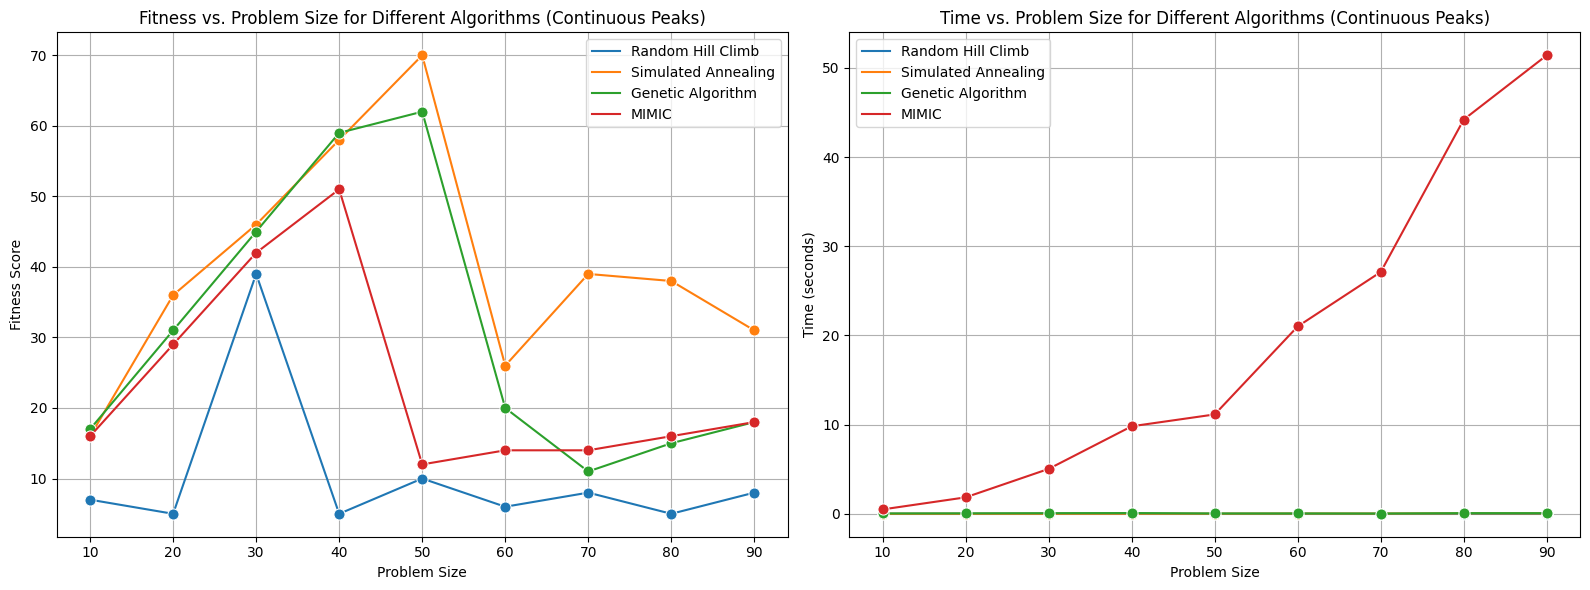

In [ ]:
plot_problem_graphs(results_df_)

In [ ]:
def plot_bar_plot_probelms(results_df, y='Time'):
  # Create a bar plot
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(data=results_df, x='Problem Size', y=y, palette='viridis', hue='Algorithm')
  p = results_df['Problem'].unique()[0]
  plt.title(f'{y} vs. Problem Size for Different Algorithms ({p})')
  plt.xlabel('Probelm Size')
  if y == 'Time':
    plt.ylabel(f'Time (seconds)')
  else:
    plt.ylabel(f'{y}')

  plt.xticks(rotation=45)
  plt.tight_layout()

  for p in ax.patches:
      ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
  plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

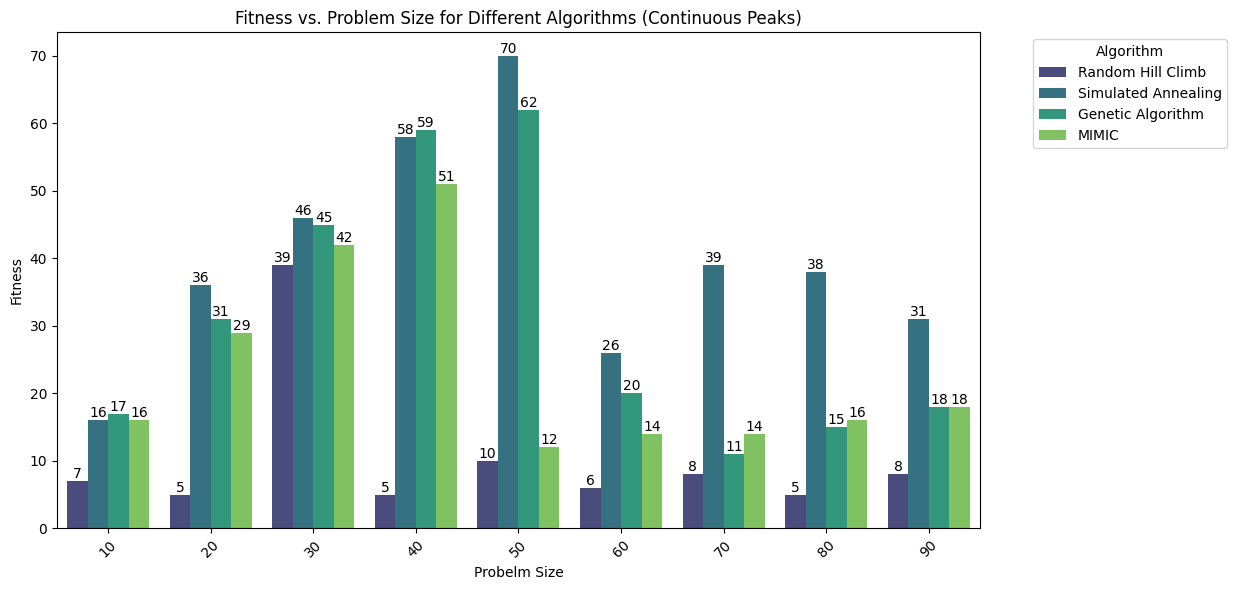

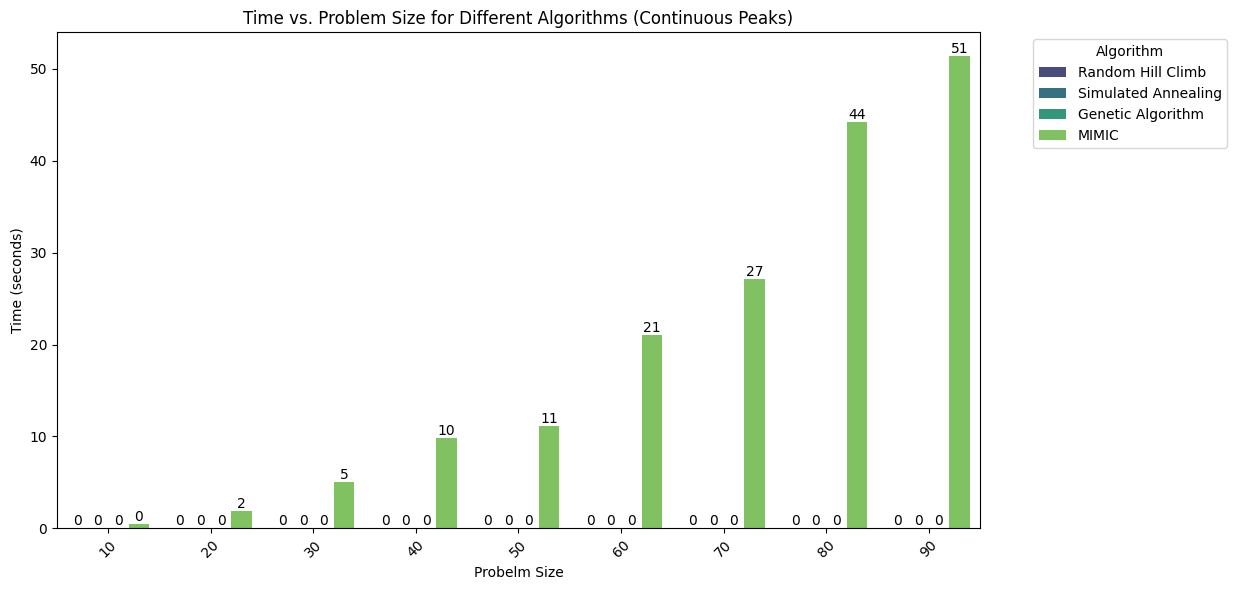

In [ ]:
plot_bar_plot_probelms(results_df_, 'Fitness')
plot_bar_plot_probelms(results_df_, 'Time')

### **Random Hill Climb:**

* **Fitness Scores:** The fitness scores range from 5.0 to 39.0 for problem sizes of 10 to 90, respectively.

* **Time:** The execution time increases slightly with larger problem sizes, ranging from 0.000318 seconds for a problem size of 20 to 0.000924 seconds for a problem size of 80.

* **Performance:** Random Hill Climb performs reasonably well on smaller problem sizes but struggles to find optimal solutions for larger problem sizes.

### **Simulated Annealing:**

* **Fitness Scores:** The fitness scores range from 16.0 to 70.0 for problem sizes of 10 to 90, respectively.

* **Time:** The execution time increases with larger problem sizes, ranging from 0.001409 seconds for a problem size of 10 to 0.046390 seconds for a problem size of 80.

* **Performance:** Simulated Annealing performs well on the Continuous Peaks problem across different problem sizes. It benefits from the probabilistic nature of the algorithm, allowing it to escape local optima.

### **Genetic Algorithm:**

* **Fitness Scores:** The fitness scores range from 17.0 to 62.0 for problem sizes of 10 to 90, respectively.

* **Time:** The execution time increases with larger problem sizes, ranging from 0.039656 seconds for a problem size of 10 to 0.083650 seconds for a problem size of 40.

* **Performance:** Genetic Algorithm performs reasonably well on the Continuous Peaks problem across different problem sizes. The use of crossover and mutation operations helps explore the search space efficiently.

### **MIMIC:**

* **Fitness Scores:** The fitness scores range from 12.0 to 51.0 for problem sizes of 10 to 90, respectively.

* **Time:** The execution time increases significantly with larger problem sizes, ranging from 0.490847 seconds for a problem size of 10 to 51.414001 seconds for a problem size of 90.

* **Performance:** MIMIC generally performs poorly on the Continuous Peaks problem compared to other algorithms. It struggles to find good solutions within a reasonable time, especially for larger problem sizes.

**Conclusion:**
Overall, Simulated Annealing and Genetic Algorithm tend to perform well on the Continuous Peaks problem across different problem sizes. Random Hill Climb can find good solutions for smaller problem sizes but becomes less effective as the problem size increases. MIMIC is generally the slowest and least effective algorithm among the four for this specific problem.

## **Flip Flop Problem**

In [ ]:
# Create empty DataFrames for each algorithm
columns = ['Problem', 'Algorithm', 'Problem Size', 'Time', 'Fitness']
results_df__ = pd.DataFrame(columns=columns)

def run_flip_flop(num_points):
    flip_flop = mlrose.DiscreteOpt(length = num_points, fitness_fn = mlrose.FlipFlop(), max_val=2)

    # Define algorithms and their names
    algorithms = [
        (lambda: mlrose.random_hill_climb(problem=flip_flop, max_attempts=6), 'Random Hill Climb'),
        (lambda: mlrose.simulated_annealing(problem=flip_flop, max_attempts=6), 'Simulated Annealing'),
        (lambda: mlrose.genetic_alg(pop_size=30, problem=flip_flop, max_attempts=6), 'Genetic Algorithm'),
        (lambda: mlrose.mimic(pop_size=30, problem=flip_flop, max_attempts=6), 'MIMIC')
    ]

    for algo_func, algo_name in algorithms:
        state, top_score, time_diff = calculate_algo_time(algo_func)
        results_df__.loc[len(results_df__)] = ['Flip Flop', algo_name, num_points, time_diff, top_score]

point_range = range(10, 100, 10)
for p in tqdm(point_range):
    run_flip_flop(p)

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
get_fitness_score_time_against_each_algo(results_df__, 'Fitness')

,Problem Size,Random Hill Climb (Fitness),Simulated Annealing (Fitness),Genetic Algorithm (Fitness),MIMIC (Fitness)
0,10,8,9,8,9
1,20,14,17,15,16
2,30,20,23,23,23
3,40,17,33,29,32
4,50,30,38,35,40
5,60,44,48,43,43
6,70,37,49,46,45
7,80,52,58,50,53
8,90,52,63,58,59


In [ ]:
get_fitness_score_time_against_each_algo(results_df__, 'Time')

,Problem Size,Random Hill Climb (Time),Simulated Annealing (Time),Genetic Algorithm (Time),MIMIC (Time)
0,10,0.000420,0.001953,0.024532,0.470488
1,20,0.000345,0.003522,0.041395,1.939989
2,30,0.000495,0.002364,0.041951,4.382921
3,40,0.000296,0.003010,0.056228,7.724890
4,50,0.000689,0.004122,0.039088,17.578103
5,60,0.000968,0.004557,0.046208,22.772775
6,70,0.000513,0.002891,0.041246,23.163670
7,80,0.000566,0.004872,0.031870,35.106045
8,90,0.000809,0.010083,0.046967,43.992597


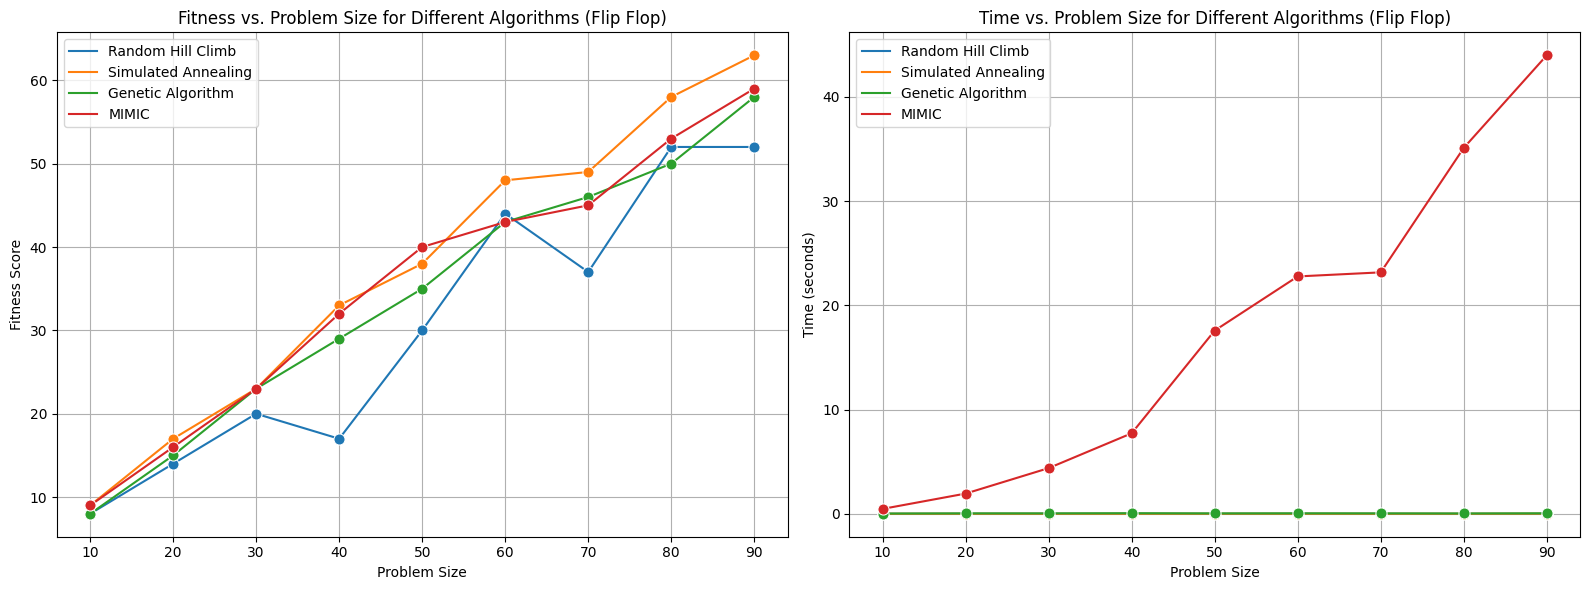

In [ ]:
plot_problem_graphs(results_df__)

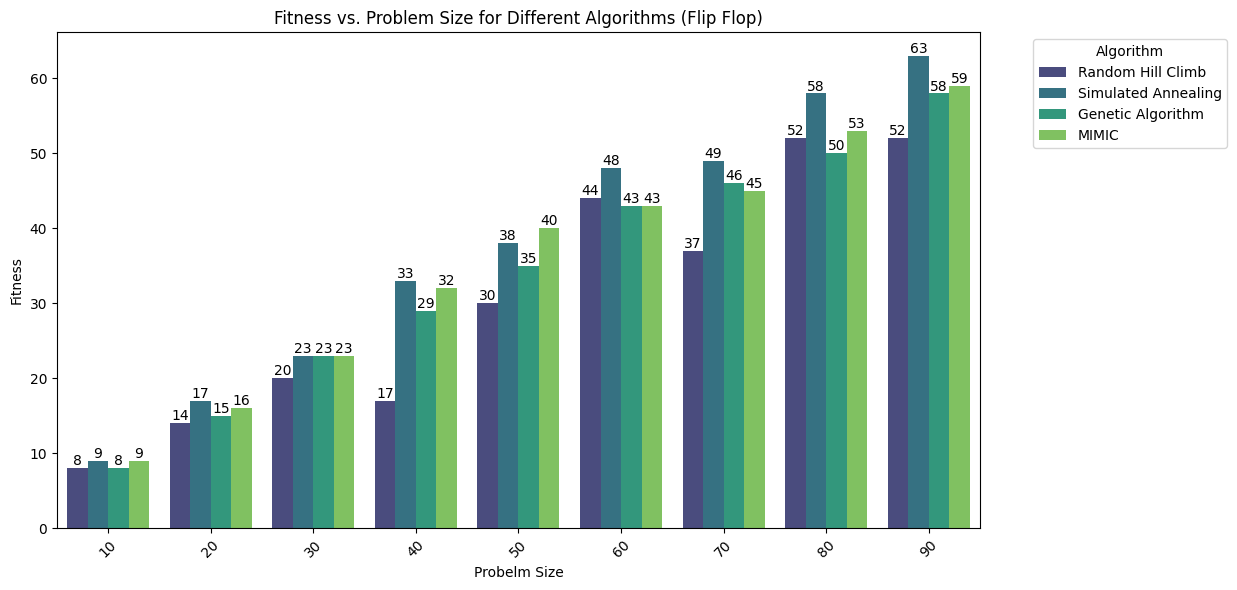

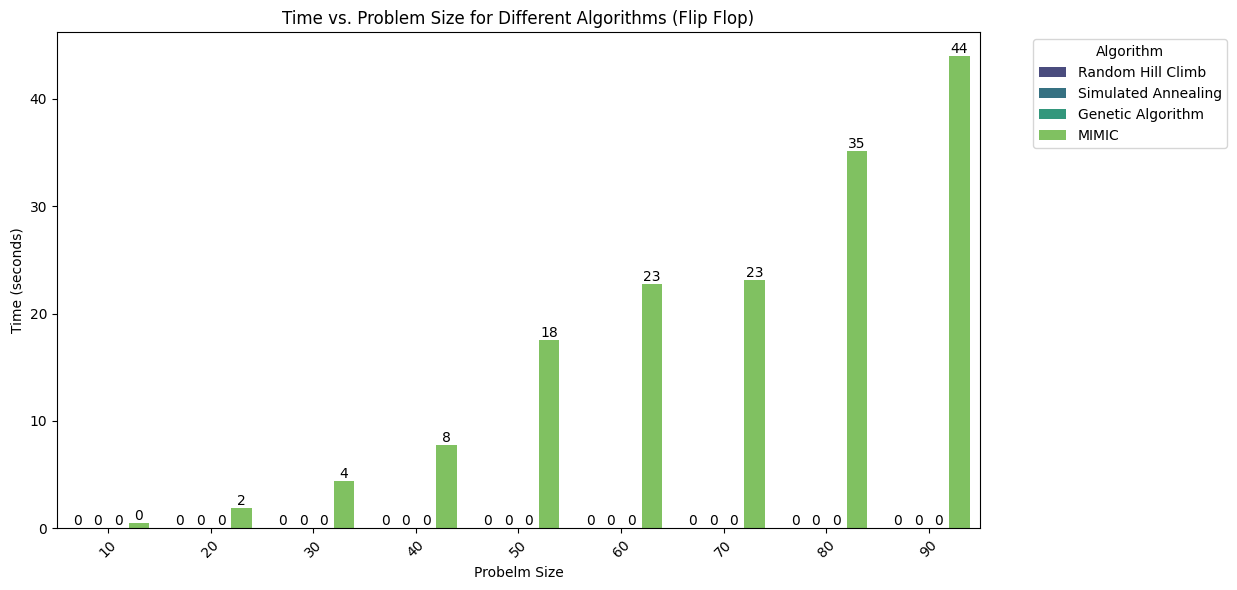

In [ ]:
plot_bar_plot_probelms(results_df__, 'Fitness')
plot_bar_plot_probelms(results_df__, 'Time')

**Fitness Scores:**

* **Random Hill Climb:** The fitness scores range from 8 to 52 for problem sizes ranging from 10 to 90.
* **Simulated Annealing:** The fitness scores range from 9 to 63 for problem sizes ranging from 10 to 90.
* **Genetic Algorithm:** The fitness scores range from 8 to 58 for problem sizes ranging from 10 to 90.
* **MIMIC:** The fitness scores range from 9 to 59 for problem sizes ranging from 10 to 90.

**Execution Times:**

* **Random Hill Climb:** The execution times range from 0.000296 seconds for a problem size of 40 to 0.000809 seconds for a problem size of 90.
* **Simulated Annealing:** The execution times range from 0.001953 seconds for a problem size of 10 to 0.010083 seconds for a problem size of 90.
* **Genetic Algorithm:** The execution times range from 0.024532 seconds for a problem size of 10 to 0.046967 seconds for a problem size of 90.
* **MIMIC**: The execution times range from 0.470488 seconds for a problem size of 10 to 43.992597 seconds for a problem size of 90.

**Performance:**
* Based on the fitness scores and execution times, Simulated Annealing and Genetic Algorithm tend to perform well on the Flip Flop problem across different problem sizes. These algorithms have the ability to explore the search space effectively, allowing them to find optimal or near-optimal solutions. Simulated Annealing benefits from its probabilistic nature, which helps it escape local optima and find better solutions. Genetic Algorithm leverages crossover and mutation operations to explore the search space efficiently and discover good solutions.

* Random Hill Climb also performs reasonably well, especially for smaller problem sizes, but it may struggle to find the global optimum in larger problem sizes. MIMIC generally performs poorly on the Flip Flop problem compared to other algorithms, as it requires a significant amount of time to find good solutions.

**Conlusion:**
* Simulated Annealing is a powerful optimization algorithm that performs well on a variety of problem domains, including combinatorial problems like the Flip Flop problem. It has the ability to escape local optima and explore the search space effectively. Simulated Annealing achieves this by allowing occasional uphill moves, which helps it avoid getting stuck in suboptimal solutions.

* Additionally, Simulated Annealing provides a good balance between exploration and exploitation, making it suitable for finding global optima while still efficiently refining solutions. It has been widely used and has demonstrated success in various optimization problems.

* Therefore, based on its performance and characteristics, Simulated Annealing would be a strong choice for optimizing the Flip Flop problem.

## **Traveling Salesman Problem**

In [ ]:
# Create empty DataFrames for each algorithm
columns = ['Problem', 'Algorithm', 'Problem Size', 'Time', 'Fitness']
results_df___ = pd.DataFrame(columns=columns)

def run_TSP(num_points):
    # Generate random city coordinates within a certain range
    city_coordinates = np.random.rand(num_points, 2) * 100  # Adjust the range as needed

    # Create a fitness function for the TSP
    fitness_fn = mlrose.TravellingSales(coords=city_coordinates)

    # Define the TSP optimization problem
    tsp = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_fn, maximize=False)

    # Define algorithms and their names
    algorithms = [
        (lambda: mlrose.random_hill_climb(problem=tsp, max_attempts=6), 'Random Hill Climb'),
        (lambda: mlrose.simulated_annealing(problem=tsp, max_attempts=6), 'Simulated Annealing'),
        (lambda: mlrose.genetic_alg(pop_size=30, problem=tsp, max_attempts=6), 'Genetic Algorithm'),
        (lambda: mlrose.mimic(pop_size=30, problem=tsp, max_attempts=6), 'MIMIC')
    ]

    for algo_func, algo_name in algorithms:
        state, top_score, time_diff = calculate_algo_time(algo_func)
        results_df___.loc[len(results_df___)] = ['Traveling Salesman', algo_name, num_points, time_diff, top_score]

point_range = range(10, 100, 10)
for p in tqdm(point_range):
    run_TSP(p)

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
get_fitness_score_time_against_each_algo(results_df___, 'Fitness')

,Problem Size,Random Hill Climb (Fitness),Simulated Annealing (Fitness),Genetic Algorithm (Fitness),MIMIC (Fitness)
0,10,487,333,317,373
1,20,789,819,799,699
2,30,1131,1312,1266,1333
3,40,1526,1612,1587,1771
4,50,1694,1851,1916,2113
5,60,2718,2798,2857,3164
6,70,3098,3425,3229,3486
7,80,3135,3439,3476,3624
8,90,4616,4321,4021,4375


In [ ]:
get_fitness_score_time_against_each_algo(results_df___, 'Time')

,Problem Size,Random Hill Climb (Time),Simulated Annealing (Time),Genetic Algorithm (Time),MIMIC (Time)
0,10,0.004587,0.002643,0.081049,0.564749
1,20,0.008205,0.004592,0.136833,1.884885
2,30,0.014185,0.004683,0.261679,4.060854
3,40,0.013890,0.014358,0.178841,6.908532
4,50,0.029629,0.016196,0.317203,10.924574
5,60,0.038706,0.012752,0.314811,15.238328
6,70,0.033469,0.016911,0.236432,21.480291
7,80,0.083744,0.045750,0.425002,27.804467
8,90,0.011963,0.013175,0.345628,34.700083


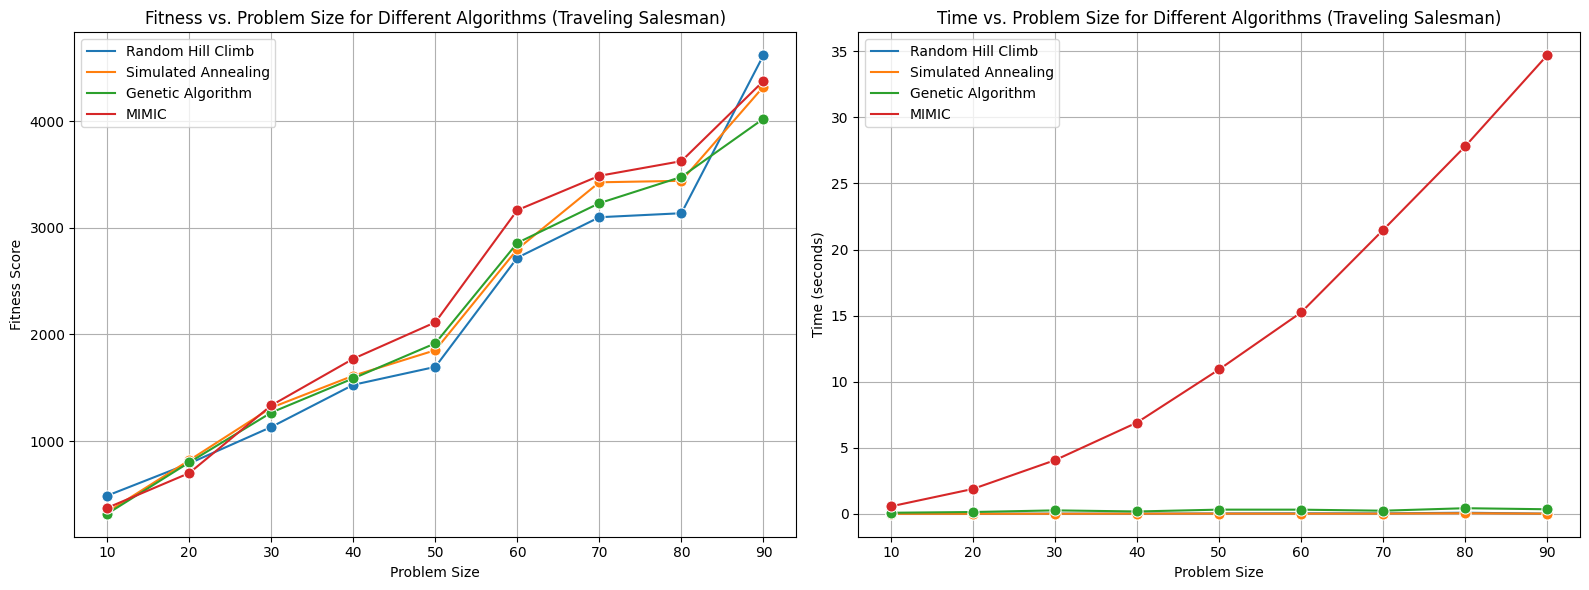

In [ ]:
plot_problem_graphs(results_df___)

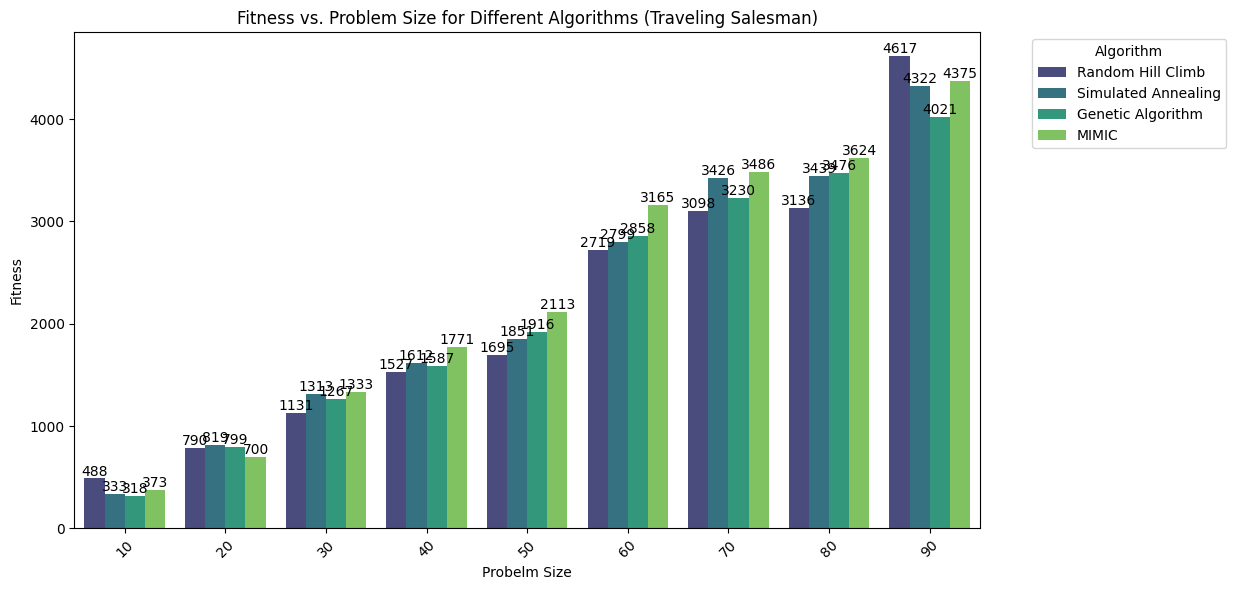

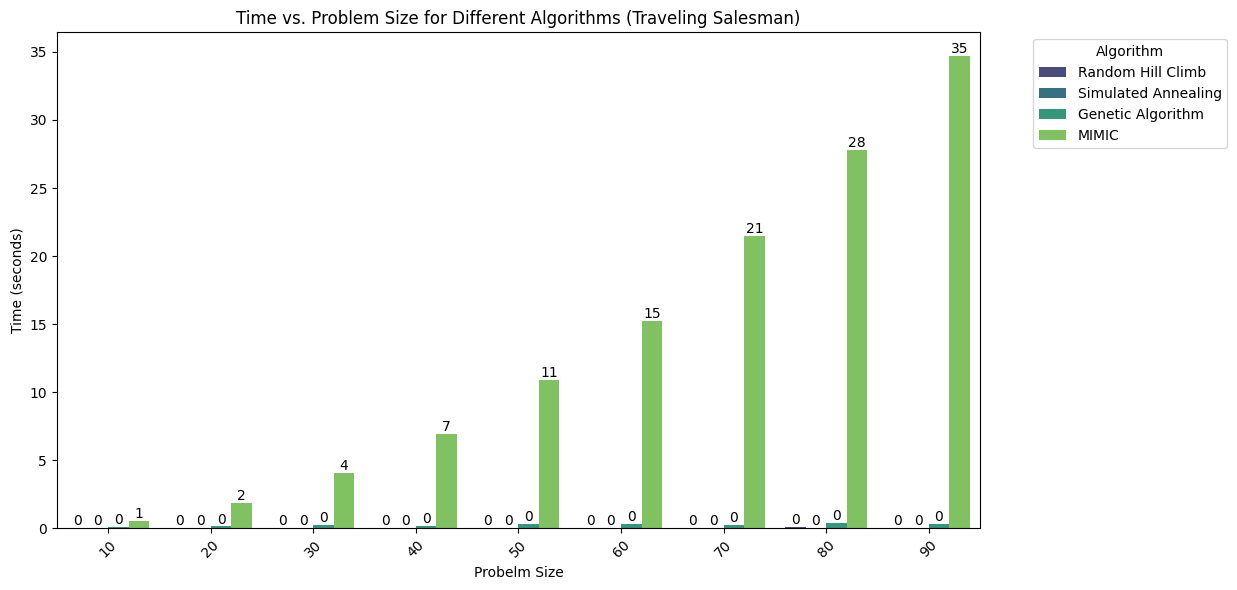

In [ ]:
plot_bar_plot_probelms(results_df___, 'Fitness')
plot_bar_plot_probelms(results_df___, 'Time')

**Fitness Scores:**

* **Random Hill Climb:** The fitness scores range from 487 to 4616 for different problem sizes.
* **Simulated Annealing:** The fitness scores range from 333 to 4321 for different problem sizes.
* **Genetic Algorithm:** The fitness scores range from 317 to 4021 for different problem sizes.
* **MIMIC:** The fitness scores range from 373 to 4375 for different problem sizes.

**Execution Times:**

* **Random Hill Climb:** The execution times range from 0.004587 seconds for a problem size of 10 to 0.083744 seconds for a problem size of 80.
* **Simulated Annealing:** The execution times range from 0.002643 seconds for a problem size of 10 to 0.045750 seconds for a problem size of 80.
* **Genetic Algorithm:** The execution times range from 0.081049 seconds for a problem size of 10 to 0.425002 seconds for a problem size of 80.
* **MIMIC:** The execution times range from 0.564749 seconds for a problem size of 10 to 34.700083 seconds for a problem size of 90.

**Performance:**
* Based on the fitness scores and execution times, Simulated Annealing and Genetic Algorithm tend to perform well on the Traveling Salesman Problem across different problem sizes. These algorithms have the ability to explore the search space effectively, allowing them to find optimal or near-optimal solutions.

* Simulated Annealing benefits from its probabilistic nature, which helps it escape local optima and find better solutions. It explores the search space by accepting uphill moves that allow it to explore new areas and potentially find better solutions. Additionally, Simulated Annealing provides a good balance between exploration and exploitation, making it suitable for finding global optima while refining solutions efficiently.

* Genetic Algorithm leverages crossover and mutation operations to explore the search space efficiently and discover good solutions. It maintains a population of candidate solutions and evolves them over generations, allowing for a diverse exploration of the solution space. Genetic Algorithm's ability to combine and mutate solutions helps it escape local optima and find better solutions.

* Random Hill Climb, although simpler, can find reasonably good solutions but might struggle to reach the global optimum. MIMIC's performance appears to be less competitive based on the provided results, as it requires significant execution time and may not find optimal solutions efficiently.


**Conclusion:**
In summary, Simulated Annealing and Genetic Algorithm are the top-performing algorithms for the Traveling Salesman Problem, thanks to their effective exploration of the search space. Simulated Annealing's probabilistic nature and Genetic Algorithm's evolutionary approach make them well-suited for solving optimization problems like the Traveling Salesman Problem.